# Find out the rpm of AC induxtion motor 

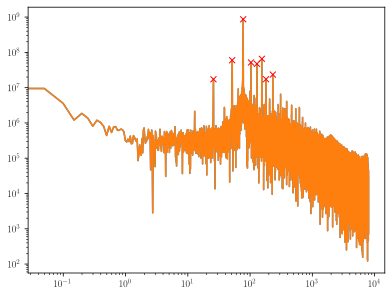

In [6]:
import numpy as np;
import matplotlib.pyplot as plt;
from scipy.fft import fft, fftfreq
plt.rcParams.update({"text.usetex":True});
%config InlineBackend.figure_format = "svg"
import scipy.io.wavfile as sw
from scipy.signal import find_peaks
sam, d = sw.read("fan.wav");
N = np.size(d)
dk = fft(d)[:N//2]
xk = fftfreq(N, 1.0/sam)[:N//2]
plt.plot(xk, np.abs(dk))
plt.loglog(xk, np.abs(dk))
peaks, _ = find_peaks(np.abs(dk), height = 1e7, distance=200)
plt.loglog(xk[peaks], np.abs(dk[peaks]), 'xr')

In [8]:
xk[peaks]

array([ 25.79365079,  51.53769841,  77.5297619 , 103.37301587,
       128.86904762, 154.61309524, 180.35714286, 231.89484127])

# rpm of a bench grinder

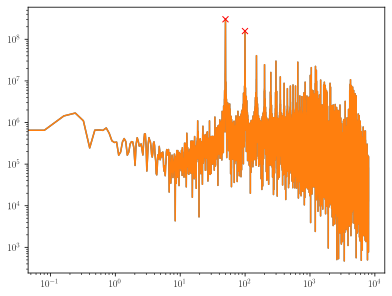

In [11]:
import numpy as np;
import matplotlib.pyplot as plt;
from scipy.fft import fft, fftfreq
plt.rcParams.update({"text.usetex":True});
%config InlineBackend.figure_format = "svg"
import scipy.io.wavfile as sw
from scipy.signal import find_peaks
sam, d = sw.read("bench.wav");
N = np.size(d)
dk = fft(d)[:N//2]
xk = fftfreq(N, 1.0/sam)[:N//2]
plt.plot(xk, np.abs(dk))
plt.loglog(xk, np.abs(dk))
peaks, _ = find_peaks(np.abs(dk), height = 1e8, distance=200)
plt.loglog(xk[peaks], np.abs(dk[peaks]), 'xr')

In [15]:
(xk[peaks])

array([49.85502577, 99.62951031])

# Doppler  shift and spectogram 

In [18]:
import numpy as np;
import matplotlib.pyplot as plt;
%config InlineBackend.figure_format = "svg"
import scipy.io.wavfile as sw

In [20]:
sam, d = sw.read("f1.wav")
print(sam)
np.size(d)

48000


1730304

In [22]:
if len(d.shape) == 1:
    print("The audio is mono.")
elif len(d.shape) == 2 and d.shape[1] == 2:
    print("The audio is stereo.")
else:
    print("Unknown audio format.")

The audio is stereo.


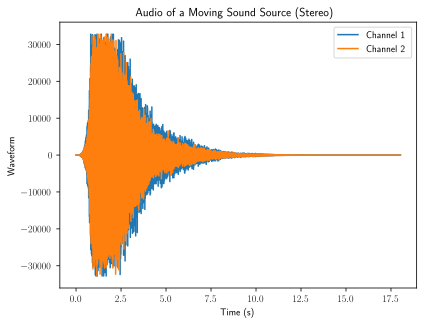

In [24]:
# Plot both channels
t = np.arange(np.size(d[:, 0])) * 1/sam
plt.plot(t, d[:, 0], label="Channel 1")
plt.plot(t, d[:, 1], label="Channel 2")
plt.title("Audio of a Moving Sound Source (Stereo)")
plt.xlabel("Time (s)")
plt.ylabel("Waveform")
plt.legend()
plt.show()


C:\Users\bikas\anaconda3\Lib\site-packages\matplotlib\axes\_axes.py:7947: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


(array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         4.31584935e-06, 9.01344646e-08, 7.87783885e-06],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         2.61696552e-06, 1.79570219e-07, 9.71859674e-06],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         7.27366564e-06, 1.71263481e-07, 2.16402721e-06],
        ...,
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         7.67273003e-11, 2.81254955e-11, 5.25204624e-08],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         1.04085223e-10, 1.42380030e-11, 4.04235207e-08],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         1.72318007e-11, 1.16858435e-12, 1.87470918e-08]]),
 array([    0.   ,    46.875,    93.75 ,   140.625,   187.5  ,   234.375,
          281.25 ,   328.125,   375.   ,   421.875,   468.75 ,   515.625,
          562.5  ,   609.375,   656.25 ,   703.125,   750.   ,   796.875,
          843.75 ,   890.625,   937.5  ,   

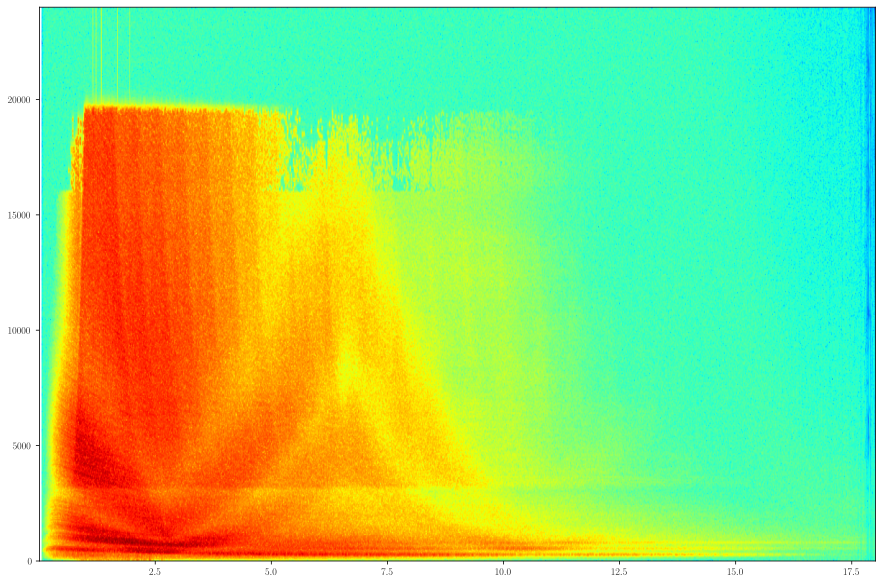

In [26]:
plt.figure(figsize=(15,10))
plt.specgram( d[:, 1], NFFT=1024, Fs=sam, noverlap=512, cmap='jet')